# Fetch Data Analyst - TAKE HOME ASSESSMENT
**WeiYing Liu**  

*Feb-22-2025* 

- Data Source: 3 Excel files, **Users**, **Transactions**, and **Products**.
- Their Entity Relationship Model is shown below

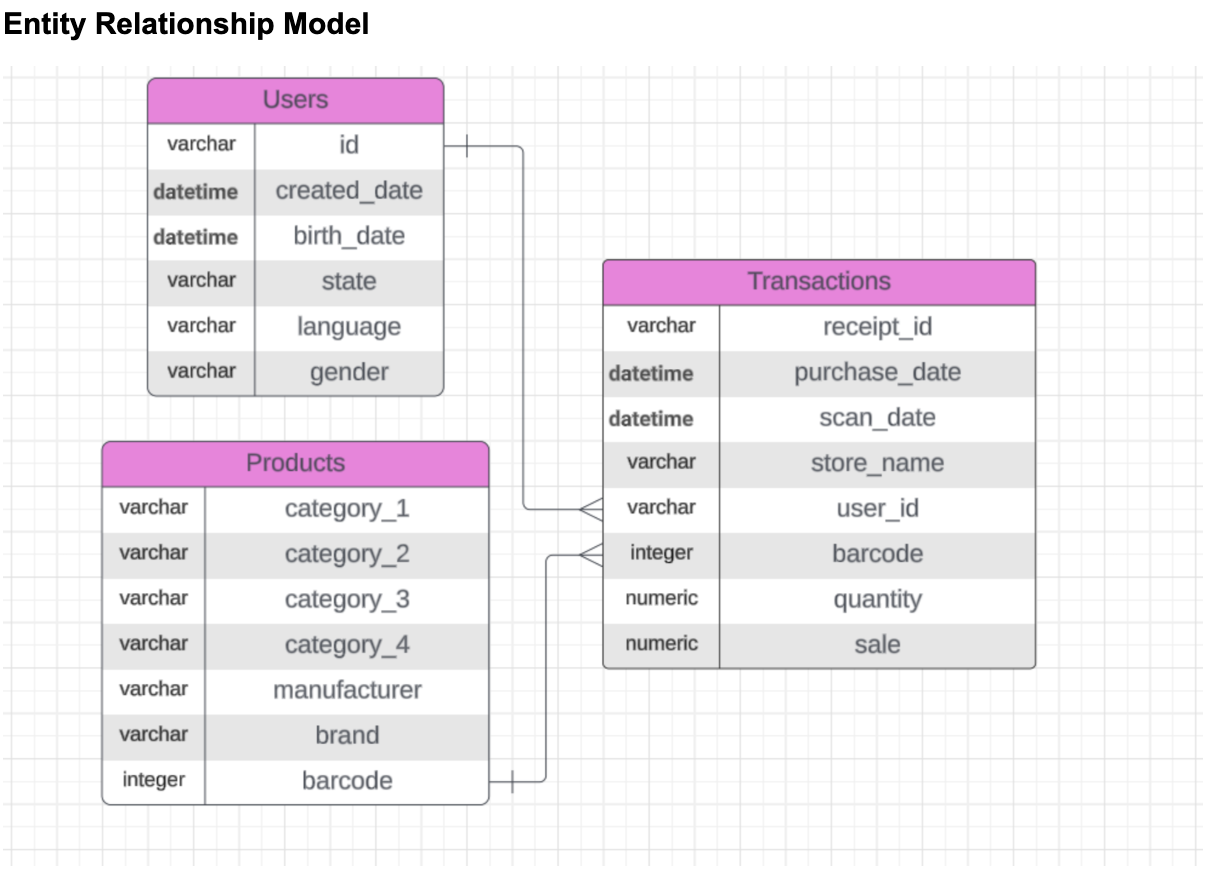

In [1]:
from IPython import display
display.Image("Fetch_ERdiagram.png", width=600, height=400)

In [2]:
# Import library for data analysis

%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load Data
df_p = pd.read_csv('PRODUCTS_TAKEHOME.csv')
df_t = pd.read_csv('TRANSACTION_TAKEHOME.csv')
df_u = pd.read_csv('USER_TAKEHOME.csv')

## Section 1 - Exploratory Data Analysis
**Review the unstructured csv files and answer the following questions with code that supports your conclusions:**
- Are there any data quality issues present?
- Are there any fields that are challenging to understand?

*Note: I will be using Python along with data visualization to perform the EDA*

### 1.0. Display basic info

In [4]:
print("📝 Product Table Info:")
print(df_p.info())
print("\n📝 First 5 Rows of 【Products】 Table:")
df_p.head()

📝 Product Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
None

📝 First 5 Rows of 【Products】 Table:


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [5]:
print("📝 Transactions Table Info:")
print(df_t.info())
print("\n📝 First 5 Rows of 【Transactions】 Table:")
df_t.head()

📝 Transactions Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
None

📝 First 5 Rows of 【Transactions】 Table:


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [6]:
print("📝 Users Table Info:")
print(df_u.info())
print("\n📝 First 5 Rows of 【Users】 Table:")
df_u.head()

📝 Users Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB
None

📝 First 5 Rows of 【Users】 Table:


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


### 1.1. Check for Missing Values

In [7]:
null_p = df_p.isnull().sum()
null_percent_p = (null_p / len(df_p)) * 100
null_df_p = pd.DataFrame({'Missing Values': null_p, 'Percentage': null_percent_p})

# Sort values by highest missing percentage
null_df_p = null_df_p.sort_values(by="Percentage", ascending=False)

print("\n📝 Missing Data Summary for 【Products】 Table:")
print(null_df_p[null_df_p["Missing Values"] > 0])


📝 Missing Data Summary for 【Products】 Table:
              Missing Values  Percentage
CATEGORY_4            778093   92.021898
MANUFACTURER          226474   26.784160
BRAND                 226472   26.783923
CATEGORY_3             60566    7.162895
BARCODE                 4025    0.476020
CATEGORY_2              1424    0.168411
CATEGORY_1               111    0.013128


In [8]:
null_t = df_t.isnull().sum()
null_percent_t = (null_t / len(df_t)) * 100
null_df_t = pd.DataFrame({'Missing Values': null_t, 'Percentage': null_percent_t})

# Sort values by highest missing percentage
null_df_t = null_df_t.sort_values(by="Percentage", ascending=False)

print("\n📝 Missing Data Summary for 【Transactions】 Table:")
print(null_df_t[null_df_t["Missing Values"] > 0])


📝 Missing Data Summary for 【Transactions】 Table:
         Missing Values  Percentage
BARCODE            5762      11.524


In [9]:
null_u = df_u.isnull().sum()
null_percent_u = (null_u / len(df_u)) * 100
null_df_u = pd.DataFrame({'Missing Values': null_u, 'Percentage': null_percent_u})

# Sort values by highest missing percentage
null_df_u = null_df_u.sort_values(by="Percentage", ascending=False)

print("\n📝 Missing Data Summary for 【Users】 Table:")
print(null_df_u[null_df_u["Missing Values"] > 0])


📝 Missing Data Summary for 【Users】 Table:
            Missing Values  Percentage
LANGUAGE             30508      30.508
GENDER                5892       5.892
STATE                 4812       4.812
BIRTH_DATE            3675       3.675


#### 1.1.1. Missing Values Significance & Cleaning
The 【Products】 table has significant missing data, especially in fields like `CATEGORY_4` (92%), `MANUFACTURER`, and `BRAND` (26%), impacting product categorization and analysis. The 【Transactions】 table might also suffer from missing `BARCODE` (11%) values, which are crucial for linking products to transactions. The 【Users】 table has missing `LANGUAGE` (30.5%) and `GENDER` (5.89%) values, affecting demographic analysis. Missing values, particularly in key fields like `BARCODE`, pose challenges for accurate data linking and analysis.  

📝 **We will remove null `BARCODE` records from the 【Products】 table, as it is the primary key.**  

📝 (Optional) Null `BARCODE` records should be removed from the 【Transactions】 table (Foreign Key) when analyzing the join with the 【Products】 table.

In [10]:
df_p = df_p[df_p.BARCODE.notna()]

### 1.2. Check for Duplicate Records

In [11]:
print(f"📝 Number of Duplicate Rows in 【Products】 Table: {df_p.duplicated().sum()}")
print(f"\n📝 Number of Duplicate Rows in 【Transactions】 Table: {df_t.duplicated().sum()}")
print(f"\n📝 Number of Duplicate Rows in 【Users】 Table: {df_u.duplicated().sum()}")

📝 Number of Duplicate Rows in 【Products】 Table: 158

📝 Number of Duplicate Rows in 【Transactions】 Table: 171

📝 Number of Duplicate Rows in 【Users】 Table: 0


#### 1.2.1. Drop Duplicate Records

In [12]:
# For the accuracy of our analysis, we are droping the duplicate records in df_p and df_t.
df_p = df_p.drop_duplicates()
df_t = df_t.drop_duplicates()

### 1.3. Check for Data Types (unexpected type)

In [13]:
print("📝 Data Types of Fields in 【Products】 Table :")
for col in df_p.columns:
    print(f"{col}: {df_p[col].dtype}")


print("\n📝 Data Types of Fields in 【Transactions】 Table :")
for col in df_t.columns:
    print(f"{col}: {df_t[col].dtype}")


print("\n📝 Data Types of Fields in 【Users】 Table :")
for col in df_u.columns:
    print(f"{col}: {df_u[col].dtype}")

📝 Data Types of Fields in 【Products】 Table :
CATEGORY_1: object
CATEGORY_2: object
CATEGORY_3: object
CATEGORY_4: object
MANUFACTURER: object
BRAND: object
BARCODE: float64

📝 Data Types of Fields in 【Transactions】 Table :
RECEIPT_ID: object
PURCHASE_DATE: object
SCAN_DATE: object
STORE_NAME: object
USER_ID: object
BARCODE: float64
FINAL_QUANTITY: object
FINAL_SALE: object

📝 Data Types of Fields in 【Users】 Table :
ID: object
CREATED_DATE: object
BIRTH_DATE: object
STATE: object
LANGUAGE: object
GENDER: object


In [14]:
# This cell is used to examine values in the interested fields.

## len(df_p.CATEGORY_1.unique()) ## CATEGORY_2, CATEGORY_3, CATEGORY_4, MANUFACTURER, BRAND

## df_t.FINAL_QUANTITY.unique() ## FINAL_SALE, PURCHASE_DATE, SCAN_DATE

## df_u.GENDER.unique() ## CREATED_DATE, BIRTH_DATE, LANGUAGE

In [15]:
pd.Series(df_t.FINAL_QUANTITY.unique()).sort_values()

70    0.01
73    0.04
17    0.09
14    0.23
56    0.24
      ... 
58    6.22
9     7.00
15    8.00
65    9.00
1     zero
Length: 87, dtype: object

> 📝 While the non-integer quantity values indicate a possible data problem, we will proceed with a float conversion to respect the existing data. To ensure a successful conversion, 'zero' will be replaced with '0' beforehand.

In [16]:
pd.Series(df_t.FINAL_SALE.unique()).sort_values()

0            
112      0.00
1135     0.01
1171     0.03
1118     0.04
        ...  
51       9.97
133      9.98
111      9.99
565     90.00
1146    93.67
Length: 1435, dtype: object

In [17]:
empty_count = (df_t["FINAL_SALE"] == " ").sum()
print(f"Number of empty string values: {empty_count}")

Number of empty string values: 12486


> 📝 The space (' ') in the sales data could represent either 0 sales or a data entry error.  
To handle this uncertainty, convert it to NaN using <errors='coerce'>.

**📝 Fields suggesting data type conversions for improved analysis:**

> - from 'float64' to 'object':
     - 【Products】 Table: BARCODE
    - 【Transactions】 Table: BARCODE
    
> - from 'object' to 'category':
    - 【Products】 Table: CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4 (Not necessary for MANUFACTURER, BRAND)
    - 【Users】 Table: STATE, LANGUAGE, GENDER
    
> - from 'object' to 'datetime64':
    - 【Transactions】Table: PURCHASE_DATE, SCAN_DATE
    - 【Users】 Table: CREATED_DATE, BIRTH_DATE
    
> - from 'object' to 'float64':
    - 【Transactions】Table: FINAL_QUANTITY (need to replace 'zero' with '0' first), FINAL_SALE (will generate 12500 null value for this field)

#### 1.3.1. Convert Data Types to Appropriate Formats

In [18]:
# from 'float64' to 'object' data type:

## 【Products】 Table: BARCODE
df_p["BARCODE"] = df_p["BARCODE"].astype("object")
## 【Transactions】 Table: BARCODE
df_t["BARCODE"] = df_t["BARCODE"].astype("object")


# from 'object' to 'category' data type:

## 【Products】 Table: CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4
Category = ["CATEGORY_1", "CATEGORY_2", "CATEGORY_3", "CATEGORY_4"]
for col in Category:
    df_p[col] = df_p[col].astype("category")
    
## 【Users】 Table: STATE, LANGUAGE, GENDER
Category = ["STATE", "LANGUAGE", "GENDER"]
for col in Category:
    df_u[col] = df_u[col].astype("category")



In [19]:
# from 'object' to 'datetime64':

## 【Transactions】Table: PURCHASE_DATE, SCAN_DATE
df_t["PURCHASE_DATE"] = pd.to_datetime(df_t["PURCHASE_DATE"], errors='coerce')
df_t["SCAN_DATE"] = pd.to_datetime(df_t["SCAN_DATE"], errors='coerce').dt.tz_localize(None)

## 【Users】 Table: CREATED_DATE, BIRTH_DATE
df_u["CREATED_DATE"] = pd.to_datetime(df_u["CREATED_DATE"], errors='coerce').dt.tz_localize(None)
df_u["BIRTH_DATE"] = pd.to_datetime(df_u["BIRTH_DATE"], errors='coerce').dt.tz_localize(None)


# from 'object' to 'float64':

## 【Transactions】Table: FINAL_QUANTITY (need to replace 'zero' with '0' first), FINAL_SALE
df_t["FINAL_QUANTITY"] = pd.to_numeric(df_t["FINAL_QUANTITY"].replace("zero", "0"), errors='coerce')
df_t["FINAL_SALE"] = pd.to_numeric(df_t["FINAL_SALE"], errors='coerce')

## errors='coerce' forces invalid values (e.g., text) to NaN instead of raising errors.

In [20]:
## Compare to "Checking for Missing Values" Cell Block

## Did `errors='coerce'` create any new null values?

## If yes, clean the data before converting data types. -> In our case, no unexpected null value generated.

## Note: We expect 12,500 null values in `df_t.FINAL_SALE` due to the original space (' ') values.

df_t.isnull().sum() #df_t.isnull().sum() #df_u.isnull().sum()

RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE            5735
FINAL_QUANTITY        0
FINAL_SALE        12486
dtype: int64

### 1.4. Check for Duplicates in Primary Keys
- Given that `ID` from 【User】and `BARCODE` from 【Products】function as primary keys establishing links to 【Transactions】 tables, it is imperative to verify record uniqueness.

- As we suspect multiple entries for a single receipt might exist in the 【Transactions】 table (potentially due to distinct products), we will further analyze `RECEIPT_ID` to gain clarity.

In [21]:
# BARCODE is the primary key in 【Products】 Table
## Check if there is any duplicate BARCODE (that is not null)
print(f"\n📝 There are {len(df_p[df_p.BARCODE.duplicated() & df_p.BARCODE.notna()])} duplicate records in BARCODE column from 【Products】 Table \n")


📝 There are 27 duplicate records in BARCODE column from 【Products】 Table 



In [22]:
# ID is the primary key in 【Users】 Table
## Check if there is any duplicate ID (that is not null)
print(f"\n📝 There are {len(df_u[df_u.ID.duplicated() & df_u.ID.notna()])} duplicate records in ID column from 【Users】 Table \n")
df_u[df_u.ID.duplicated() & df_u.ID.notna()]


📝 There are 0 duplicate records in ID column from 【Users】 Table 



,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER


In [23]:
# RECEIPT_ID is a potential Unique Key in 【Transactions】 Table
## Check if there is any duplicate RECEIPT_ID (that is not null)
print(f"\n📝 There are {len(df_t[df_t.RECEIPT_ID.duplicated() & df_t.RECEIPT_ID.notna()])} duplicate records in RECEIPT_ID column from 【Transactions】 Table.")
print(f"(There are {len(df_t)} total records in 【Transactions】 Table)")


📝 There are 25389 duplicate records in RECEIPT_ID column from 【Transactions】 Table.
(There are 49829 total records in 【Transactions】 Table)


#### 1.4.1. Analyze and Handle Duplicate Records in Primary Key

- **BARCODE from 【Products】 Table**  

In [24]:
# Review the duplicate records to understand how we should handle these duplicates 
df_p[df_p.BARCODE.duplicated(keep=False) & df_p.BARCODE.notna()].sort_values(by='BARCODE')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,404310.0
139121,Snacks,Candy,Chocolate Candy,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,404310.0
610681,Snacks,Nuts & Seeds,Snack Seeds,NaN,SUNRIDGE FARMS,SUNRIDGE FARMS,701983.0
645266,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,701983.0
681268,Snacks,Nuts & Seeds,Almonds,NaN,TRADER JOE'S,TRADER JOE'S,969307.0
171015,Snacks,Nuts & Seeds,Covered Nuts,NaN,TRADER JOE'S,TRADER JOE'S,969307.0
428256,Health & Wellness,Skin Care,Facial Lotion & Moisturizer,NaN,"R.M. PALMER COMPANY, LLC",PALMER,1018158.0
123194,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,1018158.0
36017,Snacks,Candy,Candy Variety Pack,NaN,THE HERSHEY COMPANY,HERSHEY'S,3422007.0
422809,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S,3422007.0


> 📝 While the duplicate records are a small subset and their removal has negligible impact, **we will proceed by removing duplicates and keeping the originals.** Nonetheless, SME validation is essential for improved data cleaning.

In [25]:
# Drop duplicate rows based on the 'BARCODE' column, keeping the first occurrence  
df_p = df_p.drop_duplicates(subset='BARCODE', keep='first')

In [26]:
# Check again if there is any duplicate BARCODE remaining
print(f"\n There are {len(df_p[df_p.BARCODE.duplicated() & df_p.BARCODE.notna()])} remaining duplicate records in BARCODE column from 【Products】 Table \n")


 There are 0 remaining duplicate records in BARCODE column from 【Products】 Table 



- **RECEIPT_ID from 【Transactions】 Table**  

In [27]:
# Review the first 10 duplicate records to understand the nature of duplicates
df_t[df_t.RECEIPT_ID.duplicated(keep=False) & df_t.RECEIPT_ID.notna()].sort_values(by='RECEIPT_ID').head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,NaN
41567,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539,WALMART,63b73a7f3d310dceeabd4758,15300014978.0,1.0,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,0.0,1.49
39291,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206,ALDI,62c08877baa38d1a1f6c211a,NaN,1.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,78742229751.0,1.0,NaN
25928,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813,WALMART,60842f207ac8b7729e472020,78742229751.0,1.0,2.54
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,0.0,3.49
41475,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468,FOOD LION,63fcd7cea4f8442c3386b589,783399746536.0,1.0,3.49
43233,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.0,5.29
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549,RANDALLS,6193231ae9b3d75037b0f928,47900501183.0,1.0,NaN


> 📝 Seems like the duplicate records are due to errors like **'0'** value in the `FINAL_QUANTITY` column and **Null Value** in `FINAL_SALE` column. **We should drop those records and check again.**

In [28]:
df_t = df_t[(df_t.FINAL_QUANTITY != 0) & df_t.FINAL_SALE.notna()]

In [29]:
# AGAIN Review the first 10 duplicate records to understand the nature of REMAINING duplicates
df_t[df_t.RECEIPT_ID.duplicated(keep=False) & df_t.RECEIPT_ID.notna()].sort_values(by='RECEIPT_ID').head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
43639,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702,ALDI,62676081ed0f8765fb700454,NaN,1.0,5.49
28079,00bf741b-24d6-4064-a267-f87748bb5aa9,2024-07-09,2024-07-09 17:37:14.702,ALDI,62676081ed0f8765fb700454,NaN,2.0,7.58
45071,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,41250087700.0,1.0,2.49
41005,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,41250216056.0,1.0,3.79
35488,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19.028,WINCO FOODS,6079c0e9116de356d8ad6485,51500040027.0,1.0,3.83
34963,01d0e64c-0b62-405f-a7bf-2dc04c36a53d,2024-08-23,2024-08-26 10:05:19.028,WINCO FOODS,6079c0e9116de356d8ad6485,16000207684.0,1.0,2.62
34466,03705d69-d576-4fdf-a6d0-99a8bb5380be,2024-06-21,2024-06-23 09:35:51.766,WALMART,61c0c5f97eb02e39121d8319,NaN,1.0,3.62
46405,03705d69-d576-4fdf-a6d0-99a8bb5380be,2024-06-21,2024-06-23 09:35:51.766,WALMART,61c0c5f97eb02e39121d8319,28400589321.0,1.0,4.40
37968,0373c1d8-3cc9-4cb2-a4f9-ddc7a974b671,2024-06-18,2024-06-18 13:28:17.059,WOODMAN'S MARKET,62599b14a5dbfb35e407fa71,17400118051.0,1.0,2.29
27865,0373c1d8-3cc9-4cb2-a4f9-ddc7a974b671,2024-06-18,2024-06-18 13:28:17.059,WOODMAN'S MARKET,62599b14a5dbfb35e407fa71,72878505246.0,1.0,1.99


> 📝 Following cleaning, the duplicate RECEIPT_ID values in the Transactions table indicate **separate entries for different products on the same receipt. These records can be retained.** The unique key should be a combination of *RECEIPT_ID and BARCODE*

In [30]:
# Assuming RECEIPT_ID & BARCODE combined is the Unique Key in 【Transactions】 Table
# Check if there is any duplicate combination of RECEIPT_ID & BARCODE
df_t[df_t.BARCODE.notna() & df_t.duplicated(subset=['RECEIPT_ID', 'BARCODE'], keep=False)].\
sort_values(by='RECEIPT_ID')


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
31668,19f725b1-e708-4060-b159-acc7674e5405,2024-08-23,2024-09-03 09:47:23.950,SHOP RITE,619c29ca06570b5913a151fb,311111921628.0,1.00,2.99
31675,19f725b1-e708-4060-b159-acc7674e5405,2024-08-23,2024-09-03 09:47:23.950,SHOP RITE,619c29ca06570b5913a151fb,311111921628.0,1.00,3.96
35460,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935,WALMART,663140f9b7b24d45d938f3be,24000048336.0,1.00,2.28
35459,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935,WALMART,663140f9b7b24d45d938f3be,24000048336.0,1.00,1.36
35457,2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711,2024-09-08,2024-09-08 11:13:01.935,WALMART,663140f9b7b24d45d938f3be,24000048336.0,1.00,1.48
49507,32a7b39c-eade-4e4c-88d5-caaaf285ead5,2024-09-08,2024-09-08 11:05:47.041,WALMART,66816200465f309038add7bc,50051313000.0,1.00,8.66
49506,32a7b39c-eade-4e4c-88d5-caaaf285ead5,2024-09-08,2024-09-08 11:05:47.041,WALMART,66816200465f309038add7bc,50051313000.0,1.00,3.00
42561,34bc2668-b3b6-494a-a6bc-e4a198bda1a0,2024-08-19,2024-08-19 09:58:19.741,BJ'S WHOLESALE CLUB,656339da50f017da4e476bc1,200423000001.0,1.00,12.03
42535,34bc2668-b3b6-494a-a6bc-e4a198bda1a0,2024-08-19,2024-08-19 09:58:19.741,BJ'S WHOLESALE CLUB,656339da50f017da4e476bc1,200423000001.0,1.00,13.17
43007,431fe612-ed55-470e-939c-043ad31f33f3,2024-09-07,2024-09-07 16:39:01.409,DOLLAR GENERAL STORE,5e038cebcb322c11de193bb7,12000504051.0,1.00,5.26


In [31]:
# Assuming RECEIPT_ID & BARCODE combined is the Unique Key in 【Transactions】 Table
# Check if there is any duplicate combination of RECEIPT_ID & BARCODE
print(f"\n📝 There are {len(df_t[df_t.BARCODE.notna() & df_t.duplicated(subset=['RECEIPT_ID', 'BARCODE'], keep=False)])} duplicate records in RECEIPT_ID column from 【Transactions】 Table.")
print(f"(There are {len(df_t)} total records in 【Transactions】 Table)")


📝 There are 32 duplicate records in RECEIPT_ID column from 【Transactions】 Table.
(There are 24852 total records in 【Transactions】 Table)


> 📝 Despite cleaning and assuming `RECEIPT_ID` and `BARCODE` as a unique key combination, 32 duplicate records remain in the Transactions table (out of 24,852 total records). Due to the small subset and uncertainty regarding optimal handling, **we will retain these records and seek SME advice.**

### 1.5. Check for Numerical Data Issues (inconsistencies, outliers, unrealistic values).

In [32]:
# Check again after data type conversions, which fields are numerical
## df_t.info() ## df_p.info(), df_u.info()

> 📝 Only FINAL_QUANTITY & FINAL_SALE from 【Transactions】 Table are numerical.

In [33]:
# 🔹 Numerical Features Summary
df_t.describe()

,FINAL_QUANTITY,FINAL_SALE
count,24852.000000,24852.000000
mean,1.084078,4.580774
std,1.800576,6.544073
min,0.010000,0.000000
25%,1.000000,1.800000
50%,1.000000,3.000000
75%,1.000000,5.190000
max,276.000000,462.820000


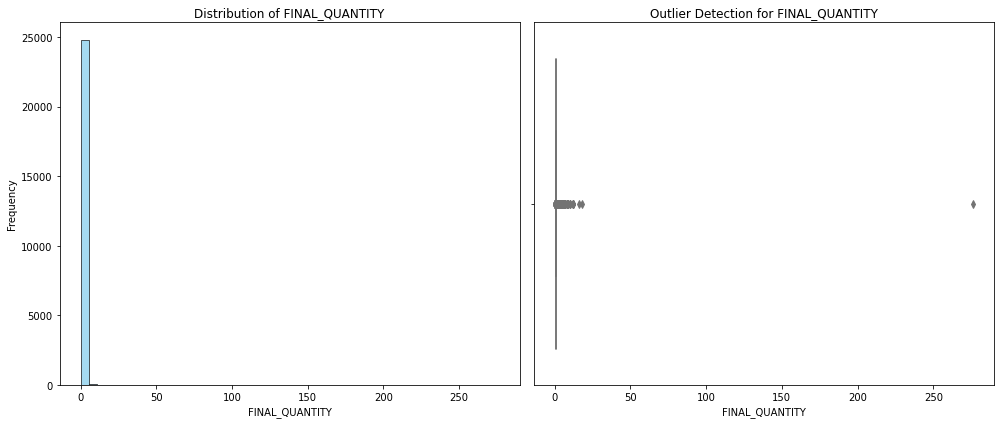

In [34]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create two subplots (one for histogram, one for boxplot)
plt.subplot(1, 2, 1)  # First subplot: Histogram
sns.histplot(df_t["FINAL_QUANTITY"], color='skyblue', bins=50)
plt.title("Distribution of FINAL_QUANTITY")
plt.xlabel("FINAL_QUANTITY")
plt.ylabel("Frequency")

# Second subplot: Boxplot for Outlier Detection
plt.subplot(1, 2, 2)  # Second subplot: Boxplot
sns.boxplot(x=df_t["FINAL_QUANTITY"], color='lightgreen')
plt.title("Outlier Detection for FINAL_QUANTITY")
plt.xlabel("FINAL_QUANTITY")

# Display the plots
plt.tight_layout()
plt.show()

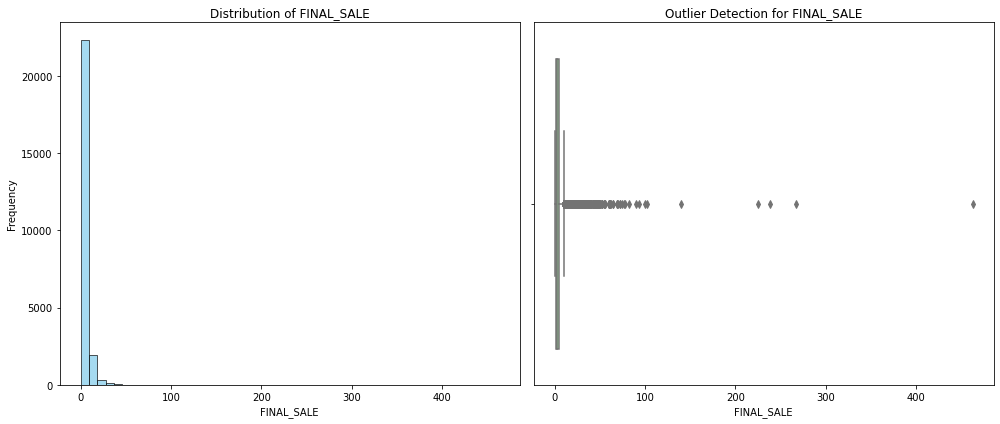

In [35]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Create two subplots (one for histogram, one for boxplot)
plt.subplot(1, 2, 1)  # First subplot: Histogram
sns.histplot(df_t["FINAL_SALE"], color='skyblue', bins=50)
plt.title("Distribution of FINAL_SALE")
plt.xlabel("FINAL_SALE")
plt.ylabel("Frequency")

# Second subplot: Boxplot for Outlier Detection
plt.subplot(1, 2, 2)  # Second subplot: Boxplot
sns.boxplot(x=df_t["FINAL_SALE"], color='lightgreen')
plt.title("Outlier Detection for FINAL_SALE")
plt.xlabel("FINAL_SALE")

# Display the plots
plt.tight_layout()
plt.show()

In [36]:
pd.Series(df_t.FINAL_QUANTITY.unique()).sort_values()

57      0.01
60      0.04
11      0.09
34      0.23
35      0.24
       ...  
15     10.00
7      12.00
47     16.00
14     18.00
61    276.00
Length: 86, dtype: float64

In [37]:
pd.Series(df_t.FINAL_SALE.unique()).sort_values()

63        0.00
980       0.01
495       0.03
1172      0.04
685       0.05
         ...  
1140    139.31
711     224.99
434     238.17
760     267.29
504     462.82
Length: 1434, dtype: float64

#### 1.5.1. Data Quality Issues Observed in Numerical Data

📝 The `FINAL_QUANTITY` column contains non-integer quantity values and zeros, indicating a potential data issue that requires clarification from a subject matter expert (SME). Similarly, the `FINAL_SALE` column has **blank** values and **zeros**, making it difficult to determine if they represent actual zeros or data entry errors. SME confirmation is needed for accurate interpretation. While both fields exhibit a dense distribution with some outliers, we will maintain the data to preserve integrity, but validation is recommended.


### 1.6. Check for Categorical Data Issues (inconsistencies, invalid categories)

In [38]:
# A quick overview of the Categorical data distribution

## df_p.select_dtypes(include=['category']).describe()
## df_t.select_dtypes(include=['category']).describe()
## df_u.select_dtypes(include=['category']).describe()

- There is no categorical data in 【Transactions】Table, we'll examine df_p & df_u only.

In [39]:
# Unique values per <category> column
print("📝 【Products】Table")

for col in df_p.select_dtypes(include=['category']):
    print(f"\n Unique values in '{col}': {df_p[col].nunique()}")
    print(f"\nTop 3 Most Common Values:")
    print(df_p[col].value_counts().head(3))

📝 【Products】Table

 Unique values in 'CATEGORY_1': 27

Top 3 Most Common Values:
Health & Wellness    510382
Snacks               323018
Beverages              3977
Name: CATEGORY_1, dtype: int64

 Unique values in 'CATEGORY_2': 121

Top 3 Most Common Values:
Candy                     120620
Hair Care                 111167
Medicines & Treatments     98734
Name: CATEGORY_2, dtype: int64

 Unique values in 'CATEGORY_3': 341

Top 3 Most Common Values:
Confection Candy                 56911
Vitamins & Herbal Supplements    55632
Chocolate Candy                  47553
Name: CATEGORY_3, dtype: int64

 Unique values in 'CATEGORY_4': 126

Top 3 Most Common Values:
Lip Balms                 9712
Already Popped Popcorn    6956
Sleep Aids                4968
Name: CATEGORY_4, dtype: int64


In [40]:
# Unique values per <category> column
print("📝 【Users】Table")

for col in df_u.select_dtypes(include=['category']):
    print(f"\n Unique values in '{col}': {df_u[col].nunique()}")
    print(f"\nTop 3 Most Common Values:")
    print(df_u[col].value_counts().head(3))

📝 【Users】Table

 Unique values in 'STATE': 52

Top 3 Most Common Values:
TX    9028
FL    8921
CA    8589
Name: STATE, dtype: int64

 Unique values in 'LANGUAGE': 2

Top 3 Most Common Values:
en        63403
es-419     6089
Name: LANGUAGE, dtype: int64

 Unique values in 'GENDER': 11

Top 3 Most Common Values:
female         64240
male           25829
transgender     1772
Name: GENDER, dtype: int64


In [41]:
# There are expected catories in STATE, LANGUAGE & GENDER
# We will examine all the unique values to check if there are any invalid categories
for col in df_u.select_dtypes(include=['category']):
    print(df_u[col].value_counts())

TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
ID     350
HI     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: STATE, dtype: int64
en        63403
es-419     6089
Name: LANGUAGE, dtype: int64
female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say    

#### 1.6.1. Data Quality Issues Observed in Categorical Data

📝 The `STATE` column contains valid US state codes. However, the `LANGUAGE` column exhibits inconsistency with 'en' and 'es-419'. Given the absence of other 'es' variations, 'es' should suffice. The `GENDER` column requires consolidation, specifically addressing variations like 'Non-Binary'/'non_binary', 'prefer_not_to_say'/'Prefer not to say', and 'not_listed'/'My gender isn't listed'.

#### 1.6.2. Consolidating and Cleaning Categorical Data

In [42]:
# Replace 'es-419' with 'es' for LANGUAGE column
df_u['LANGUAGE'] = df_u['LANGUAGE'].replace('es-419', 'es')


# Consolidating categories for GENDER column

## Standardize all gender values to lowercase
df_u['GENDER'] = df_u['GENDER'].str.lower()
## Map similar values to broader categories
gender_mapping = {
    'female': 'female',
    'male': 'male',
    'transgender': 'transgender',
    'prefer_not_to_say': 'prefer not to say',
    'non_binary': 'non binary',
    'unknown': 'unknown',
    'not_listed': 'not listed',
    'not_specified': 'unknown',
    "my gender isn't listed": 'not listed',  # Consolidating this into 'not_listed'
    'prefer not to say': 'prefer not to say',  # Consolidating with the other 'prefer_not_to_say'
}

# Apply the mapping
df_u['GENDER'] = df_u['GENDER'].map(gender_mapping).astype("category")

In [43]:
# Check the cleaned data
print(df_u['LANGUAGE'].value_counts())
print('\n')
print(df_u['GENDER'].value_counts())

en    63403
es     6089
Name: LANGUAGE, dtype: int64


female               64240
male                 25829
transgender           1772
prefer not to say     1351
non binary             473
unknown                224
not listed             185
Name: GENDER, dtype: int64


### 1.7. Check for Datetime Data Issues (invalid or unrealistic dates)

In [44]:
# Summary Statistics: Find Min and Max Dates for Each Field
print("User Data - CREATED_DATE range:", df_u['CREATED_DATE'].min(), "to", df_u['CREATED_DATE'].max())
print("User Data - BIRTH_DATE range:", df_u['BIRTH_DATE'].min(), "to", df_u['BIRTH_DATE'].max())
print("Transaction Data - PURCHASE_DATE range:", df_t['PURCHASE_DATE'].min(), "to", df_t['PURCHASE_DATE'].max())
print("Transaction Data - SCAN_DATE range:", df_t['SCAN_DATE'].min(), "to", df_t['SCAN_DATE'].max())

User Data - CREATED_DATE range: 2014-04-18 23:14:55 to 2024-09-11 17:59:15
User Data - BIRTH_DATE range: 1900-01-01 00:00:00 to 2022-04-03 07:00:00
Transaction Data - PURCHASE_DATE range: 2024-06-12 00:00:00 to 2024-09-08 00:00:00
Transaction Data - SCAN_DATE range: 2024-06-12 06:36:34.910000 to 2024-09-08 23:07:19.836000


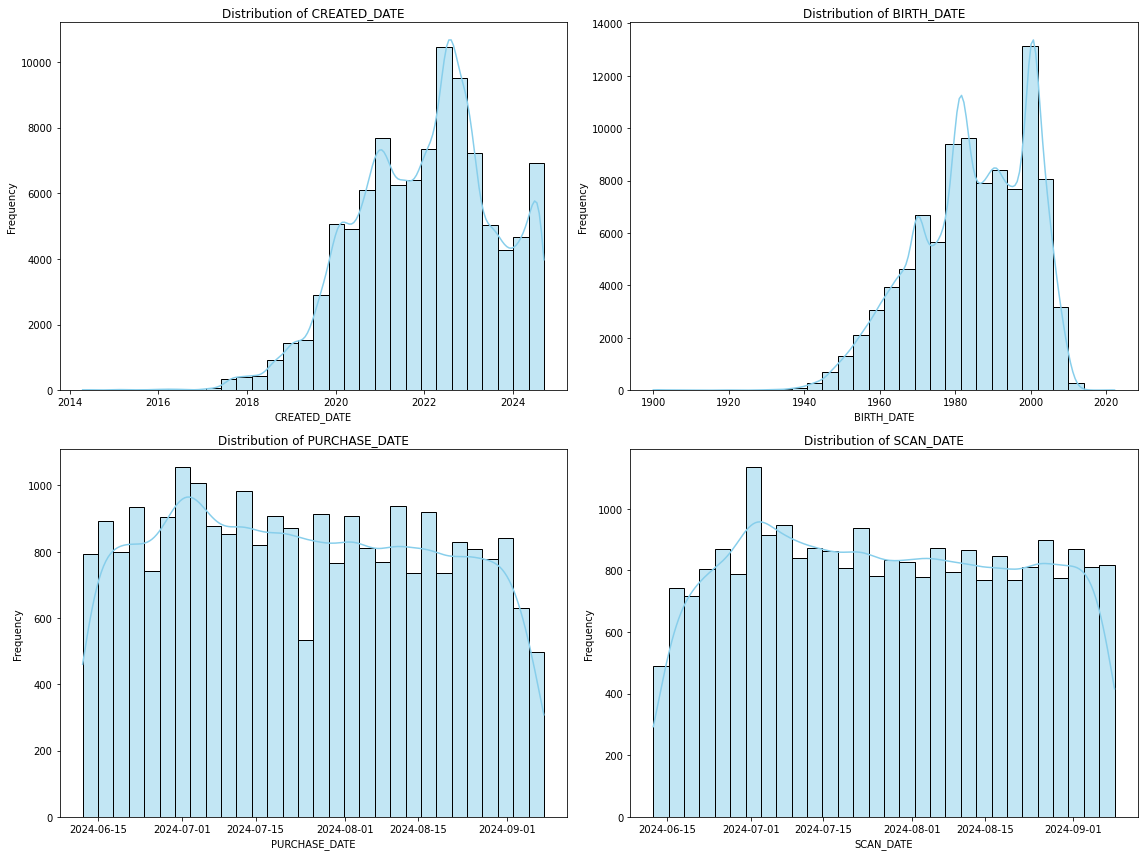

In [45]:
# Distribution of Dates: Plotting histograms and line plots

# Plot histograms for each date field to visualize their distribution
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df_u['CREATED_DATE'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of CREATED_DATE")
plt.xlabel("CREATED_DATE")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(df_u['BIRTH_DATE'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of BIRTH_DATE")
plt.xlabel("BIRTH_DATE")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(df_t['PURCHASE_DATE'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of PURCHASE_DATE")
plt.xlabel("PURCHASE_DATE")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(df_t['SCAN_DATE'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of SCAN_DATE")
plt.xlabel("SCAN_DATE")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

> 📝 All date ranges are within expected limits, with the exception of the 'BIRTH_DATE' field. Using 2024 as the reference year, the data includes individuals with birth years of 1900 (124 years old) and 2022 (2 years old).

In [46]:
# Find records with unrealistic ages based on the birth date for users.
# Given that we are a rewards app, we will assume users under 10 are too young,
# and users over 85 are too old to realistically register for our app.

# Calculate the user's age in years (ignoring null values)
df_u['age'] = 2024 - df_u['BIRTH_DATE'].dt.year

# Find users with unrealistic ages (either too young or too old)
# Our Definition: users under 13 or over 85 years old
unrealistic_age_users = df_u[(df_u['age'] < 10) | (df_u['age'] > 85)]

# Display the result
print("Users with unrealistic ages (too young or too old for our rewards apps):")
print(unrealistic_age_users[['BIRTH_DATE', 'age']].sort_values(by="age"))

Users with unrealistic ages (too young or too old for our rewards apps):
               BIRTH_DATE    age
47481 2022-03-01 05:00:00    2.0
70457 2022-04-03 07:00:00    2.0
22966 2021-01-30 05:00:00    3.0
60079 2021-01-23 05:00:00    3.0
73587 2021-03-17 05:00:00    3.0
...                   ...    ...
94185 1901-01-01 06:00:00  123.0
81087 1900-01-01 00:00:00  124.0
59306 1900-12-08 00:00:00  124.0
19638 1900-11-01 08:00:00  124.0
57986 1900-01-01 00:00:00  124.0

[200 rows x 2 columns]


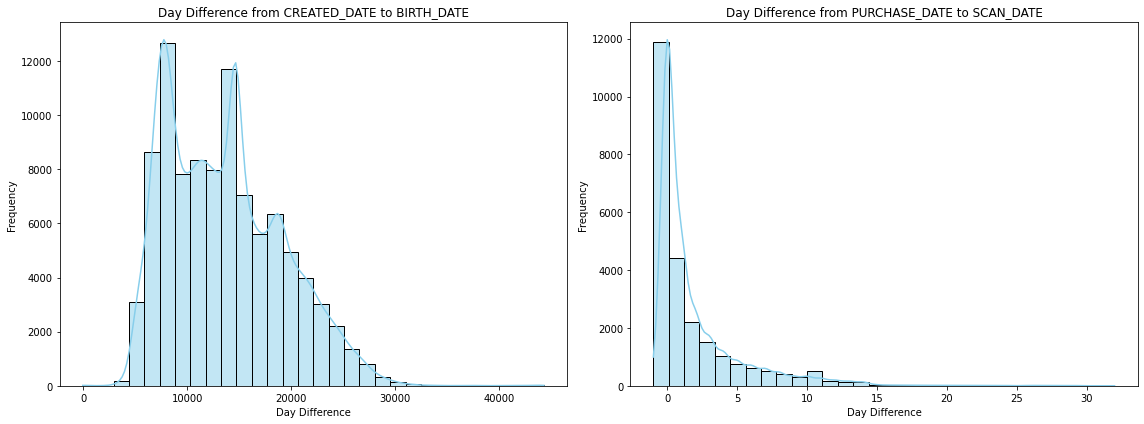

In [47]:
# Check Date Differences: 

## Day difference from BIRTH_DATE to CREATED_DATE (user registration)
## Day difference from PURCHASE_DATE to SCAN_DATE (receipt scan)

df_u['day_diff'] = (df_u['CREATED_DATE'] - df_u['BIRTH_DATE']).dt.days # Should >= 0
df_t['day_diff'] = (df_t['SCAN_DATE'] - df_t['PURCHASE_DATE']).dt.days # Should >= 0

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot age distribution for users (CREATE_DATE to BIRTH_DATE)
sns.histplot(df_u['day_diff'], kde=True, color='skyblue', bins=30, ax=axes[0])
axes[0].set_title("Day Difference from CREATED_DATE to BIRTH_DATE")
axes[0].set_xlabel("Day Difference")
axes[0].set_ylabel("Frequency")

# Plot time difference between PURCHASE_DATE and SCAN_DATE
sns.histplot(df_t['day_diff'], kde=True, color='skyblue', bins=30, ax=axes[1])
axes[1].set_title("Day Difference from PURCHASE_DATE to SCAN_DATE")
axes[1].set_xlabel("Day Difference")
axes[1].set_ylabel("Frequency")

plt.tight_layout() #prevents overlapping of titles and labels.
plt.show()

In [48]:
print("📝 Records where the receipts were scanned before the purchase date:")
df_t[df_t['day_diff']<0]

📝 Records where the receipts were scanned before the purchase date:


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,day_diff
25262,5c10e8df-9a9b-4ce0-bfed-51ab7adf2eb5,2024-07-06,2024-07-05 13:18:03.207,DOLLAR GENERAL STORE,6230b0508096d0349b6c86f7,80878195749.0,1.0,10.00,-1
27106,05023b3d-5f83-47a7-a17c-8e8521d0bc94,2024-09-08,2024-09-07 22:22:29.903,SHOP RITE,666a43c77c0469953bfd9ae0,64144041640.0,2.0,2.98,-1
27595,bfa85c94-a644-4f81-8a83-90ade603cf31,2024-06-15,2024-06-14 21:26:00.636,WALMART,5dc24cdb682fcf1229d04bd6,78742236964.0,1.0,0.47,-1
28038,878fe0e9-42e5-4de2-b9d1-da82ecf25db1,2024-06-29,2024-06-28 20:04:50.390,DOLLAR GENERAL STORE,64761a27a55bb77a0e27a417,732748017254.0,1.0,1.25,-1
28468,801eeda5-e4fe-41e1-97c2-03026765cc47,2024-08-31,2024-08-30 19:27:02.783,WALMART,5dc24cdb682fcf1229d04bd6,21000658831.0,1.0,1.24,-1
28820,9abbb4f5-ac03-465f-97a2-13158fdf4043,2024-06-16,2024-06-15 08:11:23.497,CVS,62fbe32f92710024ad021b5e,50428332221.0,1.0,5.99,-1
29295,c33e6c37-6ef2-4b4c-8b74-f96edce24995,2024-06-26,2024-06-25 22:03:31.809,WALMART,6335c6fb0c625b72ae9d1af6,38000138638.0,1.0,2.00,-1
30381,2e841c20-2560-484e-b363-6b2b2f7530a6,2024-09-05,2024-09-04 21:03:53.240,MACEY'S,5e8cec07f70de813e00885d6,38000199240.0,1.0,4.99,-1
30548,9c4f0e47-b911-4759-8b7a-ff07a89c4d0b,2024-06-22,2024-06-21 19:59:42.685,WALMART,615ca042c2fb932121380f5d,49000012781.0,1.0,11.78,-1
30690,706ce3f7-5e22-49d0-92c6-3baf3c7b72bd,2024-06-27,2024-06-26 21:57:07.771,WALMART,634aee03305e373439460ac3,51000025500.0,1.0,1.52,-1


#### 1.7.1. Data Quality Issues Observed in Datetime Data

📝 Assuming users under 10 and over 85 as unrealistic for our rewards app registration, we found 200 entries with invalid `BIRTH_DATE` values. We will preserve these records due to their other relevant data, but we advise implementing a birthdate validation process. **Age-related analyses must be approached with care.**

Regarding `SCAN_DATE` before `PURCHASE_DATE`, a minor subset, we will remove these records for now. We recommend adding data entry validation to prevent future occurrences.

#### 1.7.2. Removing Records with SCAN_DATE Before PURCHASE_DATE

In [49]:
df_t = df_t[df_t['day_diff'] >= 0]

### 1.8. Exploring Object Data Type Fields

*Note: As comprehensive issue checks are unrealistic for object data type fields, we will limit our analysis to understanding informative fields, specifically `BRAND` and `MANUFACTURER`from 【Products】 Table & `STORE_NAME`from 【Transactions】Table.*

In [50]:
# Unique values per informative <object> column in Products Table
print("📝 【Products】Table")

for col in ("BRAND", "MANUFACTURER"):
    print(f"\n Unique values in '{col}': {df_p[col].nunique()}")
    print(f"\nTop 10 Most Common Values:")
    print(df_p[col].value_counts().head(10))

📝 【Products】Table

 Unique values in 'BRAND': 8053

Top 10 Most Common Values:
REM BRAND          20813
BRAND NOT KNOWN    17022
PRIVATE LABEL      13464
CVS                 6400
SEGO                4831
MEIJER              4050
DOVE                3834
RITE AID            3238
MATRIX              2958
EQUATE              2946
Name: BRAND, dtype: int64

 Unique values in 'MANUFACTURER': 4354

Top 10 Most Common Values:
PLACEHOLDER MANUFACTURER    86895
REM MANUFACTURER            20813
PROCTER & GAMBLE            20797
L'OREAL                     16673
UNILEVER                    16655
PEPSICO                     14258
JOHNSON & JOHNSON           10287
THE HERSHEY COMPANY          9964
MARS WRIGLEY                 9646
MONDELĒZ INTERNATIONAL       7110
Name: MANUFACTURER, dtype: int64


In [51]:
# Unique values for STORE_NAME column from Transactions Table
print("📝 【Transactions】Table")

print(f"\n Unique values in 'STORE_NAME': {df_t.STORE_NAME.nunique()}")
print(f"\nTop 10 Most Common Values:")
print(df_t.STORE_NAME.value_counts().head(10))

📝 【Transactions】Table

 Unique values in 'STORE_NAME': 954

Top 10 Most Common Values:
WALMART                   10577
DOLLAR GENERAL STORE       1355
ALDI                       1313
TARGET                      742
KROGER                      730
DOLLAR TREE STORES INC      613
PUBLIX                      588
MEIJER                      587
CVS                         579
WALGREENS                   565
Name: STORE_NAME, dtype: int64


#### 1.8.1. Uncertainty in Most Common Values of Object Fields

📝 Uncertainty in Most Common Values: The `BRAND` column contains values like 'BRAND NOT KNOWN', 'PRIVATE LABEL', and 'None', while the `MANUFACTURER` column includes 'PLACEHOLDER MANUFACTURER'. These values require clarification from a subject matter expert (SME) to determine their meaning and explore options for data supplementation or consolidation."

## EDA Summary
**1. Are there any data quality issues present?**

- **Missing Data:** Product classification is limited by significant missing data in the 【Products】 table: `CATEGORY_4` (92%), `MANUFACTURER`, and `BRAND` (26%). In the 【Transactions】 table, 11% of `BARCODE` values are missing, disrupting product-transaction mapping. User data is impacted by missing `LANGUAGE` (30.5%) and `GENDER` (5.89%) values.  Null `BARCODE` records were removed from the Products table, as `BARCODE` serves as the primary key. Null `BARCODE` values in the Transactions table, functioning as foreign keys, should be removed when analyzing joins with the 【Products】 table.


- **Duplicates:** The 【Products】 (215) and 【Transactions】 (171) tables contain duplicate records, requiring cleanup.

- **Primary/Foreign Key Integrity:** To maintain referential integrity, 27 duplicate `BARCODE` records were removed from the 【Products】 table, where `BARCODE` is the primary key. The 【Transactions】 table contained 25,389 duplicate `RECEIPT_ID` records. Some were attributed to invalid `FINAL_QUANTITY` and `FINAL_SALE` values. After cleaning, 32 duplicate `RECEIPT_ID` records remained, despite considering `RECEIPT_ID` and `BARCODE` as a composite unique key. These remaining records will be retained pending SME input.

- **Data Type Issues:** `BARCODE` should be converted to object, categorical fields should use category, and date-related fields need conversion to datetime64.

- **Numerical Data Concerns:** `FINAL_QUANTITY` and `FINAL_SALE` contain unexpected zeros and blanks, there are also some outliers observed, requiring SME validation.

- **Datetime Issues:** Some transactions have `SCAN_DATE` before `PURCHASE_DATE`. 200 users have unrealistic (Assumption: under 10 or over 85.) `BIRTH_DATE` values. *We should seek confirmation on the appropriate age parameters for Fetch.*


**2. Are there any fields that are challenging to understand?**

- **Uncertain Numerical Values:** The presence of non-standard numerical values in `FINAL_QUANTITY` and `FINAL_SALE` indicates a need for subject matter expert (SME) validation. We require clarification on how to accurately interpret these values, whether data transformations are necessary, and if `FINAL_SALE` represents total receipt spending or per-unit amounts that need to be multiplied by `FINAL_QUANTITY` to derive total spending.

- **Challenging Primary/Foreign Key Integrity:** The presence of duplicate `RECEIPT_ID` records in the Transactions table, even after addressing invalid `FINAL_QUANTITY` and `FINAL_SALE` values and considering `RECEIPT_ID` and `BARCODE` as a composite unique key, raises concerns. We seek SME confirmation on the correct interpretation of these duplicates, the correct unique key for this table, and validation of the data cleaning performed. 

- **Unclear Placeholder Values:** `BRAND` and `MANUFACTURER` contain ambiguous labels like 'BRAND NOT KNOWN' and 'PLACEHOLDER MANUFACTURER', requiring SME clarification.

- **Inconsistent Categorical Data:** `GENDER` and `LANGUAGE` require standardization to ensure consistency in analysis.

## Section 2 - SQL Queries
**Answer THREE of the following questions with at least one question coming from the closed-ended and one from the open-ended question set. Each question should be answered using one query.**

- **Closed-ended questions:**
1. What are the top 5 brands by receipts scanned among users 21 and over?
2. 📝 What are the top 5 brands by sales among users that have had their account for at least six months?
3. What is the percentage of sales in the Health & Wellness category by generation?

- **Open-ended questions:**
 *for these, make assumptions and clearly state them when answering the question.*
1. 📝 Who are Fetch’s power users?
2. Which is the leading brand in the Dips & Salsa category?
3. 📝 At what percent has Fetch grown year over year?



> **Questions selected are denoted with 📝.** Selections are based on potential data issues, prioritizing those minimally impacted by unresolved issues. For example, due to potential age-related inaccuracies, age-specific questions were excluded.

**Recap of data cleaning:**
1. Remove null `BARCOD`E records from Products 
2. Remove invalid/uninformative `FINAL_SALE` and `FINAL_QUANTITY` values (NaN & zeros)
2. Remove duplicate records, including primary key duplicates
3. Convert Data Type
4. Consolidate and clean `LANGUAGE` & `GENDER` column
5. Removing Records with SCAN_DATE Before PURCHASE_DATE

**Important Notes:**
1. Null `BARCODE` records should be removed when analyzing the join of 【Products】 and 【Transactions】 tables.
2. Age-related analyses are subject to potential inaccuracies due to the presence of approximately 200 records with users under 10 or over 85.

### 2.0. Review Post-Cleaning Data Tables
*Note: To ensure accurate analysis, please review the data tables post-cleaning, as they have been modified to address observed data quality issues.*

In [52]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841342 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CATEGORY_1    841231 non-null  category
 1   CATEGORY_2    840681 non-null  category
 2   CATEGORY_3    782629 non-null  category
 3   CATEGORY_4    67232 non-null   category
 4   MANUFACTURER  615125 non-null  object  
 5   BRAND         615127 non-null  object  
 6   BARCODE       841342 non-null  object  
dtypes: category(4), object(3)
memory usage: 29.7+ MB


In [53]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24805 entries, 25000 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   RECEIPT_ID      24805 non-null  object        
 1   PURCHASE_DATE   24805 non-null  datetime64[ns]
 2   SCAN_DATE       24805 non-null  datetime64[ns]
 3   STORE_NAME      24805 non-null  object        
 4   USER_ID         24805 non-null  object        
 5   BARCODE         21949 non-null  object        
 6   FINAL_QUANTITY  24805 non-null  float64       
 7   FINAL_SALE      24805 non-null  float64       
 8   day_diff        24805 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 1.9+ MB


In [54]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            100000 non-null  object        
 1   CREATED_DATE  100000 non-null  datetime64[ns]
 2   BIRTH_DATE    96325 non-null   datetime64[ns]
 3   STATE         95188 non-null   category      
 4   LANGUAGE      69492 non-null   category      
 5   GENDER        94074 non-null   category      
 6   age           96325 non-null   float64       
 7   day_diff      96325 non-null   float64       
dtypes: category(3), datetime64[ns](2), float64(2), object(1)
memory usage: 4.1+ MB


### 2.1. What are the top 5 brands by sales among users that have had their account for at least six months?
*From closed-ended question set*

In [55]:
# Importing the pandasql library, which allows us to run SQL queries on Pandas DataFrames
## !pip install pandasql

from pandasql import sqldf

**📝 Assumptions:**

1. **Top 5 by sales of the brand:** We are calculating the total sales amount for each brand across all receipts. We are using DENSE_RANK() to rank brands based on their total sales, ensuring ties are handled appropriately.
2. **6-month threshold:** Users registered at least six months prior to the maximum SCAN_DATE will be included. This approach respects the potential data extraction time, ensuring that the analysis reflects the most recent activity within the dataset.

In [56]:
# Find max SCAN_DATE
max(df_t.SCAN_DATE)

Timestamp('2024-09-08 23:07:19.836000')

In [57]:
Query_1 ="""
    WITH RankedBrands AS (
        SELECT 
            p.BRAND, 
            SUM(t.FINAL_SALE) AS total_sales,
            DENSE_RANK() OVER (ORDER BY SUM(t.FINAL_SALE) DESC) AS dense_rank
        FROM 
            df_t t
        JOIN 
            df_u u ON t.USER_ID = u.ID
        JOIN 
            df_p p ON t.BARCODE = p.BARCODE
        WHERE 
            t.FINAL_SALE IS NOT NULL
            AND u.CREATED_DATE <= DATE('2024-09-08', '-6 months')  -- 6-month threshold calculation
        GROUP BY 
            p.BRAND
    )


    SELECT *
    FROM RankedBrands
    WHERE dense_rank <= 5
    ORDER BY dense_rank;
"""

sqldf(Query_1)

,BRAND,total_sales,dense_rank
0,CVS,72.00,1
1,DOVE,30.91,2
2,TRIDENT,23.36,3
3,COORS LIGHT,17.48,4
4,TRESEMMÉ,14.58,5


### 2.2. Who are Fetch’s power users?
*From open-ended question set*

**📝 Assumptions:**

We define "Fetch’s power users" as those who meet two criteria:

1. **Sales Amount:**  Users with a sum of `FINAL_SALE` greater than $30, indicating significant spending.

2. **Receipts Scan Frequency:** Users who have scanned receipts in each month, demonstrating consistent engagement.

In [58]:
Query_2 ="""
    WITH monthly_transactions AS (
        SELECT 
            t.USER_ID,
            strftime('%Y-%m', t.SCAN_DATE) AS month,  -- Extract year-month from SCAN_DATE
            SUM(t.FINAL_SALE) AS total_sales
        FROM 
            df_t t
        GROUP BY 
            t.USER_ID, strftime('%Y-%m', t.SCAN_DATE)
    ),
    user_sales_sum AS (
        SELECT 
            t.USER_ID,
            SUM(t.FINAL_SALE) AS total_sales
        FROM 
            df_t t
        GROUP BY 
            t.USER_ID
        HAVING 
            SUM(t.FINAL_SALE) > 30  -- Sum of FINAL_SALE should be greater than 30
    )
    SELECT 
        u.USER_ID,
        u.total_sales,
        COUNT(DISTINCT m.month) AS count_month_with_receipts
    FROM 
        user_sales_sum u
    JOIN 
        monthly_transactions m ON u.USER_ID = m.USER_ID
    GROUP BY 
        u.USER_ID, u.total_sales
    HAVING 
        COUNT(DISTINCT m.month) = (SELECT COUNT(DISTINCT strftime('%Y-%m', SCAN_DATE)) FROM df_t)
    ORDER BY 
        u.USER_ID;
"""

sqldf(Query_2)

,USER_ID,total_sales,count_month_with_receipts
0,5c7d90d2b04d6162f25f49ae,30.57,4
1,5eb59d6be7012d13941af5e2,34.99,4
2,64063c8880552327897186a5,30.61,4
3,646a82267a342372c857800a,37.71,4
4,65bfa5dbe43f8851491ca8dd,32.35,4
5,666a2e417c0469953bfd9656,39.26,4


### 2.3. At what percent has Fetch grown year over year?
*From open-ended question set*

**📝 Assumptions:**

- **Definition:** We focus growth on registered user count, assuming our objective is to expand the user base.

- **User Growth Metric:** Year-over-year (YOY) growth is calculated as the change in registered user count, based on `CREATED_DATE`, assuming registration directly reflects growth, excluding factors like user activity or churn.
- **Time Period:** Analysis covers the dataset's full time range, calculating annual user registrations. YOY growth for the first year will be NULL.

In [59]:
Query_3 ="""
WITH Yearly_User_Counts AS (
    SELECT 
        strftime('%Y', CREATED_DATE) AS Year, 
        COUNT(ID) AS User_Count
    FROM 
        df_u
    GROUP BY 
        strftime('%Y', CREATED_DATE)
),
Growth_Calculation AS (
    SELECT 
        Year,
        User_Count,
        LAG(User_Count) OVER (ORDER BY Year) AS Previous_Year_Count
    FROM 
        Yearly_User_Counts
)
SELECT 
    Year,
    User_Count,
    Previous_Year_Count,
    CASE 
        WHEN Previous_Year_Count IS NULL THEN NULL
        ELSE ROUND(((User_Count - Previous_Year_Count) * 100.0 / Previous_Year_Count), 2)
    END AS YOY_Growth_Percentage
FROM 
    Growth_Calculation
ORDER BY 
    Year;
"""

sqldf(Query_3)

,Year,User_Count,Previous_Year_Count,YOY_Growth_Percentage
0,2014,30,NaN,NaN
1,2015,51,30.0,70.00
2,2016,70,51.0,37.25
3,2017,644,70.0,820.00
4,2018,2168,644.0,236.65
5,2019,7093,2168.0,227.17
6,2020,16883,7093.0,138.02
7,2021,19159,16883.0,13.48
8,2022,26807,19159.0,39.92
9,2023,15464,26807.0,-42.31


In [60]:
# Use seaborn to plot the result
yoy_user_growth = sqldf(Query_3)

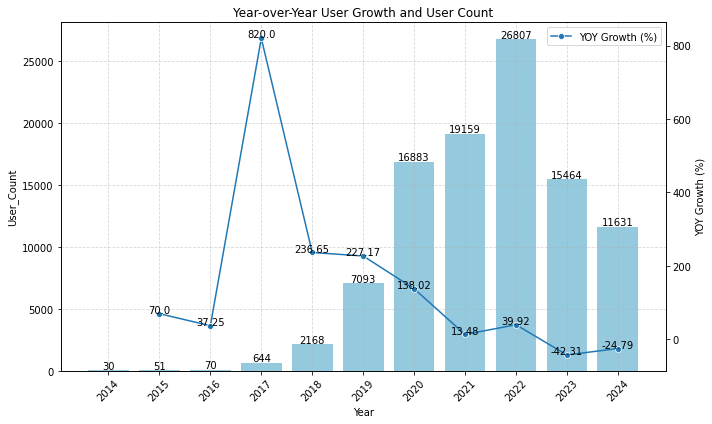

In [61]:
# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot User Count as bar plot on the primary axis
sns.barplot(data=yoy_user_growth, x='Year', y='User_Count', ax=ax1, color='skyblue', label='User Count')
ax1.set_xlabel('Year')

# Add labels for user count with check for finite values
for i in range(len(yoy_user_growth)):
    user_count = yoy_user_growth['User_Count'].iloc[i]
    if np.isfinite(user_count):  # Check if the value is finite
        ax1.text(yoy_user_growth['Year'].iloc[i], user_count + 100,  # Position the label slightly above the bar
                 round(user_count, 0), ha='center', color='black', fontsize=10)

# Create a secondary axis for the YOY Growth Percentage
ax2 = ax1.twinx()
sns.lineplot(data=yoy_user_growth, x='Year', y='YOY_Growth_Percentage', ax=ax2, marker='o', label='YOY Growth (%)')
ax2.set_ylabel('YOY Growth (%)')

# Add labels for YOY Growth Percentage with check for finite values
for i in range(len(yoy_user_growth)):
    yoy_growth = yoy_user_growth['YOY_Growth_Percentage'].iloc[i]
    if np.isfinite(yoy_growth):  # Check if the value is finite
        ax2.text(yoy_user_growth['Year'].iloc[i], yoy_growth + 2,  # Position the label slightly above the point
                 round(yoy_growth, 2), ha='center', fontsize=10)

# Adding title and grid
plt.title('Year-over-Year User Growth and User Count')
ax1.grid(True, linestyle='--', alpha=0.5)

# Optional: Show grid lines for better readability
ax1.set_xticks(yoy_user_growth['Year'])
ax1.set_xticklabels(yoy_user_growth['Year'], rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Section 3 - Stakeholder Communication
**Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation. Include:**

1. Key data quality issues and outstanding questions about the data
2. One interesting trend in the data *(Use a finding from part 2 or come up with a new insight)*
3. Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues

> 📝 Below is the email content to the business leader.

**Subject: Data Quality Issues & Key Insights – Input Needed**

Hi (Business Leader Name),

I’ve been reviewing our data quality and identifying key trends. Here’s a summary:

**1. Key Data Challenges & Questions**

I've identified significant data quality issues that impact our analysis:

* **Incomplete Data:** Numerous critical data fields are missing substantial amounts of information, hindering accurate product and user analysis.
* **Data Duplication:** We've found a large number of duplicate transaction records, which require clarification to ensure data integrity.
* **Data Inconsistencies:** We've observed unexpected values and date discrepancies that need further investigation and validation.

**Key Questions for Business Guidance:**

* Do nulls have specific meanings (e.g., private label for brands)?
* How should we interpret and handle duplicate transaction records?
* What are the correct interpretations and units for our sales and quantity data? (Not integer, 0, Null)
* Do we have standard definition for user age range?
* Is it possible for a scan date to precede a purchase date in transactions?
* Are there potential opportunities for consolidation and value mapping in any categorical columns?

**2. Notable Trend in the Data**  

User growth peaked in **2022 (26,807 users)** and declined sharply in 2024 (-24.79% YoY, **potentially due to incomplete data**). Excluding 2024, strong growth (2020-2022) transitioned to a slowdown in 2023, suggesting early **retention issues**. 

Are there known business factors driving this trend (e.g., market saturation, product changes, competition)? And should we investigate deeper to identify internal or external causes?  

**3. Next Steps & Request for Input**   
- Response to Key Questions listed above.
- Understanding the business context behind declining user growth.  

I'd appreciate a brief meeting to discuss this further. Please let me know when you're available. Also, could you share the relevant contacts for additional guidance?

Thank you, 
  
WeiYing 
